<h1>Movie Recommendation Engine</h1>

<pre>
Authors            : Rajendra Bhagroo  | Thomas Lavenziano | Kevin Canales
Emails             : Rbhagroo@Nyit.edu | Tlavenzi@nyit.edu | Kcanal02@nyit.edu

Course Name        : Introduction To Data Mining
Course Number      : CSCI 415 - W01
Course Instructor  : Xueqing Huang

Date Due           : 5/8/19
Date Last Modified : 5/7/19
Kernel             : Python 3.7.1

Credits: 
* Movie Lens Dataset (100,000) : https://www.kaggle.com/grouplens/movielens-latest-small#README.md
* To Improve System  (20M)     : https://www.kaggle.com/grouplens/movielens-20m-dataset#rating.csv
* Usman Malik                  : https://bit.ly/2U6jwMn
</pre>

In [ ]:
# Install Pip Packages For The Current Jupyter Kernel
from sys import executable

!{executable} -m pip install --upgrade pip
!{executable} -m pip install numpy
!{executable} -m pip install pandas
!{executable} -m pip install matplotlib
!{executable} -m pip install seaborn

# Installing Tensorflow: https://www.tensorflow.org/install/pip
# We Are Using Tensorflow-1.13.1
!{executable} -m pip install --upgrade tensorflow

In [4]:
# Sets Matplotlib's Backend Engine To Display Plots Within Current Jupyter Kernel
%matplotlib inline

# Plotting Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

# Sets Tensorflow As The Backend Engine
import tensorflow as tf

# Array Processing Libraries
import numpy as np
import pandas as pd

In [5]:
# Load Dataset (Unzip From Repo)

'''
Dataset Info:
    Generated On : September 26, 2018
    Users        : 610
    Ratings      : 100836
    Tags         : 3683
    Movies       : 9742
'''

movies_df = pd.read_csv(r"movielens-latest-small/movies.csv")
ratings_df = pd.read_csv(r"movielens-latest-small/ratings.csv")

In [6]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# Merge Ratings And Movie Datasets

movie_data = pd.merge(ratings_df, movies_df, on='movieId')  
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [9]:
# Average Rating Of Each Movie

movie_data.groupby('title')['rating'].mean().head()  

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [10]:
# Average Rating of Each Movie (Sorted)
# Problem: Movies Can Top This List With Only One Rating vs Many Ratings

movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()  

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [11]:
# Total Ratings By Movie

movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [12]:
'''
Important Attributes:
    Average Rating Per Movie
    Number of Ratings Per Movie 
'''

# Create Dataframe With Important Attributes

ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean()) 

ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 

ratings_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Text(0.52, 1.05, 'Number of Ratings  vs  Number of Movies')

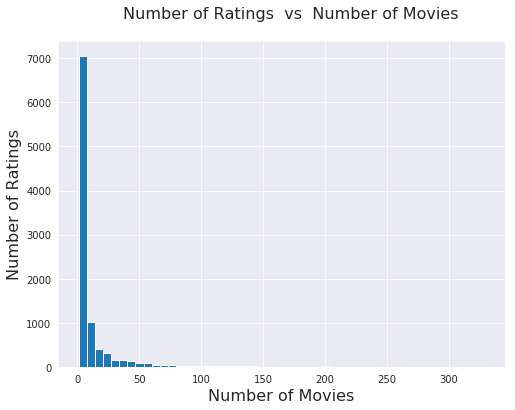

In [101]:
# Histogram: Number of Ratings Per Movie

sns.set_style('dark')
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)

plt.xlabel('Number of Movies', fontsize=16)
plt.ylabel('Number of Ratings', fontsize=16)
plt.title('Number of Ratings  vs  Number of Movies', x=0.52, y=1.05, fontsize=16)

Text(0.5, 1.05, 'Average Rating  vs  Number of Ratings')

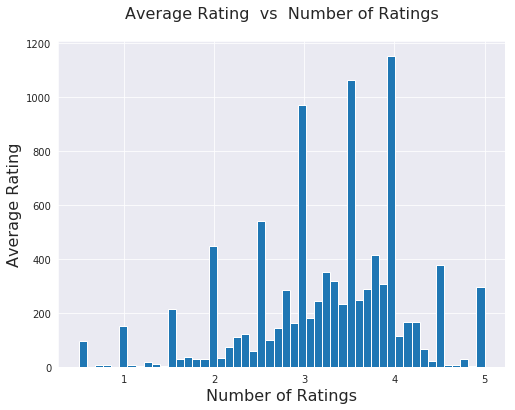

In [108]:
# Histogram: Average Ratings Per Movie

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating'].hist(bins=50)  

plt.xlabel('Number of Ratings', fontsize=16)
plt.ylabel('Average Rating', fontsize=16)
plt.title('Average Rating  vs  Number of Ratings', x=0.50, y=1.05, fontsize=16)

Text(0.54, 1.05, 'Number of Ratings  vs  Average Movie Rating')

<Figure size 432x216 with 0 Axes>

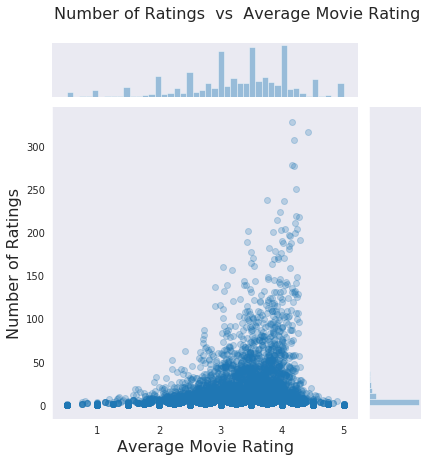

In [287]:
# Movies With Higher Average Ratings = Larger Number of Ratings

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ax = sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.25)

ax.set_axis_labels('Average Movie Rating', 'Number of Ratings', fontsize=16)
plt.suptitle('Number of Ratings  vs  Average Movie Rating', x=0.54, y=1.05, fontsize=16)

In [239]:
# Dataframe: User ID & their rating per movie
# Issue: Not every user has rated every movie

user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating').sort_values(by='userId', ascending=True)
user_movie_rating

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [231]:
# Dataframe: The amount of users that gave a specfic rating per movie 
# Issue: Not every user has rated every movie

user_movie_rating = pd.pivot_table(movie_data[movie_data.rating > 1], index='rating', columns=['title'], values='userId').sort_values(by='rating', ascending=False)
user_movie_rating

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
rating,,,,,,,,,,,,,,,,,,,,,
5.0,NaN,NaN,NaN,345.0,345.0,NaN,283.500000,NaN,223.200000,NaN,...,345.0,NaN,448.333333,NaN,NaN,NaN,308.666667,NaN,NaN,34.500000
4.5,NaN,NaN,NaN,NaN,NaN,NaN,561.000000,NaN,357.166667,NaN,...,NaN,NaN,NaN,419.0,NaN,NaN,405.000000,NaN,NaN,NaN
4.0,610.0,332.0,NaN,NaN,NaN,NaN,303.000000,NaN,266.533333,477.0,...,NaN,NaN,610.000000,NaN,NaN,NaN,390.222222,238.000000,NaN,241.200000
3.5,NaN,NaN,354.5,NaN,NaN,NaN,387.000000,NaN,247.666667,550.0,...,NaN,NaN,439.666667,610.0,NaN,NaN,461.333333,296.142857,NaN,231.750000
3.0,NaN,NaN,NaN,NaN,113.0,NaN,265.666667,474.0,229.000000,453.0,...,307.0,NaN,213.000000,380.0,495.0,184.0,457.000000,252.428571,NaN,449.714286
2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.250000,448.0,...,NaN,NaN,NaN,NaN,NaN,NaN,347.000000,248.000000,307.0,373.666667
2.0,NaN,NaN,NaN,NaN,NaN,NaN,236.333333,NaN,298.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,391.000000,414.500000,274.0,122.750000
1.5,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,462.000000,NaN,...,NaN,448.0,NaN,NaN,NaN,NaN,NaN,432.000000,521.0,NaN


In [265]:
# Show All Ratings For A Particular Movie
# Forrest Gump Has A High Number of Ratings

forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']  
forrest_gump_ratings[forrest_gump_ratings > 0].head(10)  

userId
1     4.0
6     5.0
7     5.0
8     3.0
10    3.5
11    5.0
14    4.0
15    5.0
16    3.5
17    5.0
Name: Forrest Gump (1994), dtype: float64

In [280]:
# Find Movies Related To Forrest Gump Using Kendall Tau's Correlation (Scaled)

movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings, method="kendall")

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])

corr_forrest_gump.Correlation = corr_forrest_gump.Correlation * 100.0 # Scale to highlight differences
corr_forrest_gump.columns = ['Correlation x 100']

corr_forrest_gump.dropna(inplace=True)

corr_forrest_gump.head() 

,Correlation x 100
title,
"'burbs, The (1989)",14.834771
(500) Days of Summer (2009),27.016184
*batteries not included (1987),84.615385
...And Justice for All (1979),100.000000
10 Cent Pistol (2015),-100.000000


In [281]:
# Find Movies Related To Forrest Gump Using Spearman's Rank Correlation (Scaled)

movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings, method="spearman")

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])

corr_forrest_gump.Correlation = corr_forrest_gump.Correlation * 100.0 # Scale to highlight differences
corr_forrest_gump.columns = ['Correlation x 100']

corr_forrest_gump.dropna(inplace=True)


corr_forrest_gump.head() 

,Correlation x 100
title,
"'burbs, The (1989)",19.257963
(500) Days of Summer (2009),31.432735
*batteries not included (1987),89.393939
...And Justice for All (1979),100.000000
10 Cent Pistol (2015),-100.000000


In [282]:
# Find Movies Related To Forrest Gump Using Pearson's Correlation (Scaled)

movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings, method="pearson")

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])

corr_forrest_gump.Correlation = corr_forrest_gump.Correlation * 100.0 # Scale to highlight differences
corr_forrest_gump.columns = ['Correlation x 100']

corr_forrest_gump.dropna(inplace=True)

corr_forrest_gump.head()

,Correlation x 100
title,
"'burbs, The (1989)",19.771188
(500) Days of Summer (2009),23.409504
*batteries not included (1987),89.270955
...And Justice for All (1979),92.857143
10 Cent Pistol (2015),-100.000000


In [283]:
# Find Movies Related To Forrest Gump Using Pearson's Correlation (Not Scaled)

movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings, method="pearson")

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)

corr_forrest_gump.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [284]:
# Sort Movies To Find Highest Correlation To Forrest Gump
# Problem: User Can Rate Forrest Gump (5) And Have No Other Relevant Ratings 

corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Cercle Rouge, Le (Red Circle, The) (1970)",1.0
Play Time (a.k.a. Playtime) (1967),1.0
Killers (2010),1.0
Playing God (1997),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0
"Century of the Self, The (2002)",1.0
Welcome to the Jungle (2013),1.0


In [285]:
# Demonstrates Problem

corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  
corr_forrest_gump.head()  

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [286]:
# Solution: Filter Correlated Movies To Show Ratings With Over 50 Ratings

corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head() 

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
